In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\SS\Downloads\MDS Course files\Data set\Cust_Segmentation  US.csv")

In [3]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
df.shape

(850, 10)

In [5]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
Customer Id        850 non-null int64
Age                850 non-null int64
Edu                850 non-null int64
Years Employed     850 non-null int64
Income             850 non-null int64
Card Debt          850 non-null float64
Other Debt         850 non-null float64
Defaulted          700 non-null float64
Address            850 non-null object
DebtIncomeRatio    850 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [7]:
# dummy=pd.get_dummies(df['Address'],drop_first=True)

In [8]:
# dummy
# df=pd.concat([df.loc[:, df.columns != 'Address'],dummy])

In [9]:
df=df.drop('Address',axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
Customer Id        850 non-null int64
Age                850 non-null int64
Edu                850 non-null int64
Years Employed     850 non-null int64
Income             850 non-null int64
Card Debt          850 non-null float64
Other Debt         850 non-null float64
Defaulted          700 non-null float64
DebtIncomeRatio    850 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.8 KB


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
x=df.values[:,1:]
x=np.nan_to_num(x)

In [13]:
clus_dataset=StandardScaler().fit_transform(x)
clus_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [14]:
from sklearn.cluster import KMeans

In [15]:
cluster_num=4
k_means = KMeans(init= 'k-means++' , n_clusters = cluster_num , n_init = 8)

In [16]:
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=8, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
labels = k_means.labels_

In [18]:
print(labels)

[0 3 2 0 1 2 2 2 0 3 2 0 0 0 0 0 0 0 2 0 0 0 0 2 3 2 0 0 2 0 3 2 0 0 0 0 0
 0 0 3 0 3 0 3 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 3 0
 0 0 2 0 3 2 2 2 3 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 3 2 2 0 2 0 0 2 2 2
 0 0 0 0 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 3 3 0 2 0 0 2 2 0 0 2 0 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 3 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 3 0 0 0 0 2 0 1 3 0 0 2 2 2 0 0 2 2 2 2 0 3
 0 0 0 0 3 0 0 2 0 0 2 0 2 0 0 0 2 0 0 0 0 0 0 3 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 2 2 2 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 3 3 0 3 0 2 0 3 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 0 0 2 0 2 0 0 2 0 0 3 2 2 3 0
 0 2 0 0 2 0 2 0 2 0 0 2 0 0 2 0 0 3 0 0 0 0 0 3 0 0 0 3 0 0 0 2 0 2 3 3 2
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 3 0 2 0 0 0 0 2 0 0 0 0 0 3 0 0 0 0 0 0 0 2 0
 2 3 0 0 2 0 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 2 2 2 0 0 1
 2 0 2 2 2 0 2 0 0 0 3 0 0 0 0 2 0 3 0 0 0 0 2 0 2 2 2 0 2 3 2 0 2 0 0 0 2
 0 2 0 0 0 0 3 0 0 0 2 0 

In [19]:
k_means_cluster_centers = k_means.cluster_centers_

In [20]:
k_means_cluster_centers

array([[3.20660714e+01, 1.61071429e+00, 5.45892857e+00, 2.80767857e+01,
        9.28905357e-01, 1.89449107e+00, 2.46428571e-01, 1.01078571e+01],
       [4.66000000e+01, 2.30000000e+00, 2.12000000e+01, 2.70900000e+02,
        7.88400000e+00, 1.33752000e+01, 3.00000000e-01, 8.21000000e+00],
       [3.97590909e+01, 1.80909091e+00, 1.29227273e+01, 6.29000000e+01,
        2.32304545e+00, 4.46300909e+00, 1.68181818e-01, 1.07327273e+01],
       [4.34166667e+01, 2.18333333e+00, 1.94833333e+01, 1.23400000e+02,
        3.83666667e+00, 7.34046667e+00, 8.33333333e-02, 9.03666667e+00]])

# Determine the optimal value of K

In [21]:
cost=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i,max_iter = 500)
    KM.fit(x)
    cost.append(KM.inertia_)

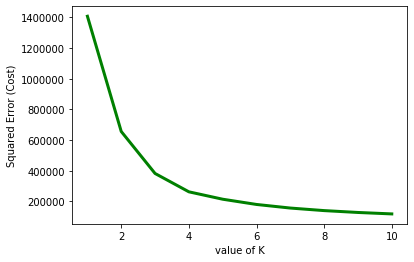

In [22]:
plt.plot(range(1,11),cost,color='g',linewidth='3')
plt.xlabel("value of K")
plt.ylabel("Squared Error (Cost)")
plt.show()

In [23]:
cost

[1408001.2844996965,
 655932.1242140447,
 381844.7976715175,
 262049.86564812952,
 213770.6392036415,
 179563.28107084282,
 156102.63187994223,
 139451.67815861842,
 127289.50321962035,
 117827.83993087981]

# INSIGHTS

In [24]:
new_df = df
new_df['clus_km'] = labels
new_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,3
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
Customer Id        850 non-null int64
Age                850 non-null int64
Edu                850 non-null int64
Years Employed     850 non-null int64
Income             850 non-null int64
Card Debt          850 non-null float64
Other Debt         850 non-null float64
Defaulted          700 non-null float64
DebtIncomeRatio    850 non-null float64
clus_km            850 non-null int32
dtypes: float64(4), int32(1), int64(5)
memory usage: 63.2 KB


In [26]:
# We can easily check the centroid values by averaging the features in each cluster.

In [27]:
new_df.groupby('clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
clus_km,,,,,,,,,
0,433.456172,32.050089,1.611807,5.445438,28.048301,0.930440,1.896669,0.296774,10.122898
1,453.500000,46.600000,2.300000,21.200000,270.900000,7.884000,13.375200,0.428571,8.210000
2,411.262443,39.764706,1.805430,12.923077,62.814480,2.312855,4.445878,0.203297,10.691855
3,399.150000,43.416667,2.183333,19.483333,123.400000,3.836667,7.340467,0.108696,9.036667


### Now, lets look at the distribution of customers based on their age and income

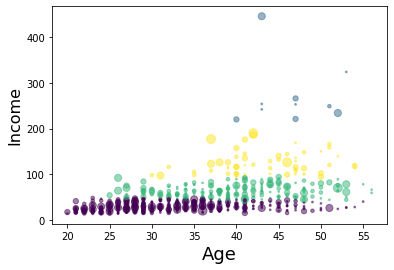

In [28]:
area = np.pi*(x[:,1])**2
plt.scatter(x[:,0] , x[:,3],s=area,c=labels.astype(np.float),alpha=0.5)
# plt.ylim([0,100])
plt.xlabel('Age',fontsize=18)
plt.ylabel('Income',fontsize=16)
plt.show()